Confusion Matrix:
[[55  3]
 [ 1 21]]
Accuracy: 0.95


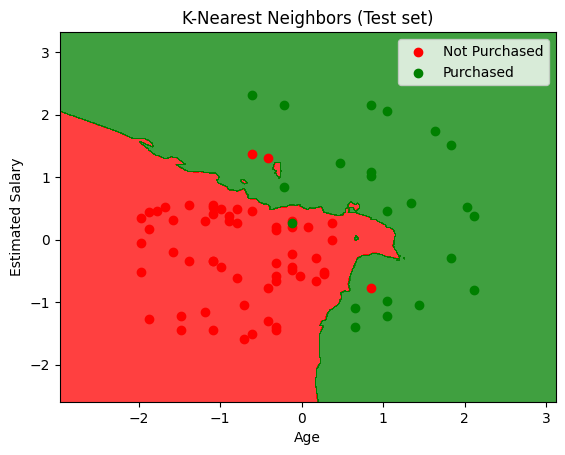

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# Step 1: Download the dataset
ds = pd.read_csv('Social_Network_Ads.csv')

# Step 2: Prepare the data
X = ds.iloc[:, [2, 3]].values
y = ds.iloc[:, 4].values

# Step 3: Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4: Perform feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 5:  K-Nearest Neighbors (K-NN) 
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

# Step 6: Make predictions on the Test set
y_pred = classifier.predict(X_test)

# Step 7: Evaluate the model using confusion matrix, accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)


# Step 8: Visualize the K-Nearest Neighbors 
x1, x2 = np.meshgrid(
    np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
    np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='red', label='Not Purchased')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='green', label='Purchased')
plt.title('K-Nearest Neighbors (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


im my opinion  he K-Nearest Neighbors (KNN) model performed well with an accuracy of 0.95. It correctly classified 95% of the instances in the test set. This indicates that the model is effective in predicting whether someone is likely to buy the new mobile phone based on their age and estimated salary.